In [2]:
import pandas as pd
import numpy as np

# Skipping the first 7 rows
df = pd.read_excel(r"C:\Users\BERKAY\Desktop\data\TÜİK\sanayi uretim endeksi tarihsel seriler (2021=100).xlsx", engine="openpyxl", skiprows=7)


In [3]:
#Filling missing year values in table
df['Yıl\nYear'] = df['Yıl\nYear'].fillna(method='ffill')

C:\Users\BERKAY\AppData\Local\Temp\ipykernel_14196\1800717491.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Yıl\nYear'] = df['Yıl\nYear'].fillna(method='ffill')


In [4]:
#Dropping empty columns
df = df.drop(['Unnamed: 7', 'Unnamed: 13', 'Unnamed: 19'], axis=1)


In [5]:
df1 = df.copy()

# Manually cleaning column names
df1.columns = [
    'Year', 'Month', 'Index', 'Index.1', 'Annual change (%)', 'Index.2',
    'Monthly change (%)', 'Index.3', 'Index.4', 'Annual change (%).1',
    'Index.5', 'Monthly change (%).1', 'Index.6', 'Index.7', 'Annual change (%).2',
    'Index.8', 'Monthly change (%).2', 'Index.9', 'Index.10', 'Annual change (%).3',
    'Index.11', 'Monthly change (%).3'
]

In [6]:
# Dropping rows where 'Year' is 1986 for simplicity
df1 = df1[df1['Year'] != 1986]

In [7]:
# Drop rows with missing values
df1 = df1.dropna()

In [ ]:
#Turning year feature to in from object
df1["Year"] = df1["Year"].astype(int)

In [9]:
df1.dtypes

Year                      int64
Month                   float64
Index                   float64
Index.1                 float64
Annual change (%)       float64
Index.2                 float64
Monthly change (%)      float64
Index.3                 float64
Index.4                 float64
Annual change (%).1     float64
Index.5                 float64
Monthly change (%).1    float64
Index.6                 float64
Index.7                 float64
Annual change (%).2     float64
Index.8                 float64
Monthly change (%).2    float64
Index.9                 float64
Index.10                float64
Annual change (%).3     float64
Index.11                float64
Monthly change (%).3    float64
dtype: object

In [10]:
df1.columns = df1.columns.str.replace(" ", "_")
df1.columns = df1.columns.str.replace(".", "_")

df1.columns


Index(['Year', 'Month', 'Index', 'Index_1', 'Annual_change_(%)', 'Index_2',
       'Monthly_change_(%)', 'Index_3', 'Index_4', 'Annual_change_(%)_1',
       'Index_5', 'Monthly_change_(%)_1', 'Index_6', 'Index_7',
       'Annual_change_(%)_2', 'Index_8', 'Monthly_change_(%)_2', 'Index_9',
       'Index_10', 'Annual_change_(%)_3', 'Index_11', 'Monthly_change_(%)_3'],
      dtype='object')

In [ ]:
import seaborn as sea
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 200)

In [12]:
# We have 4 main category and 3 sub category for each of them. 
# Total Industry, Mining and Quarrying, Manufacturing and Electricity, gas, steam and air conditioning supply is 4 main ones
# Unadjusted, Calendar adjusted and Seasonal and calendar adjusted are the 3 sub categories

# First lets look at each year's unadjusted mean index with column chart. This will allow us to compare categories against each other
# more clearly.

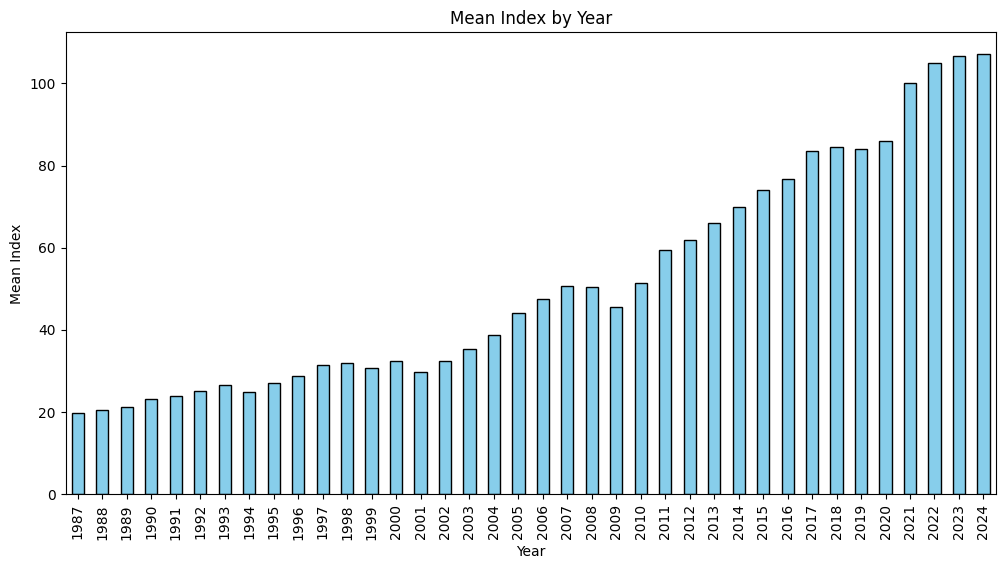

In [13]:
#Histogram comparison of each year's unadjusted indexes
mean_index_per_year = df1.groupby('Year')['Index'].mean()

plt.figure(figsize=(12, 6))

mean_index_per_year.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Mean Index by Year')
plt.xlabel('Year')
plt.ylabel('Mean Index')

plt.show()

In [14]:
# There is a positive acceleration in growth as we see. Espaclly since 2009 there is a steady growth.
# Lets create the linechart version of this data display change over time clearly

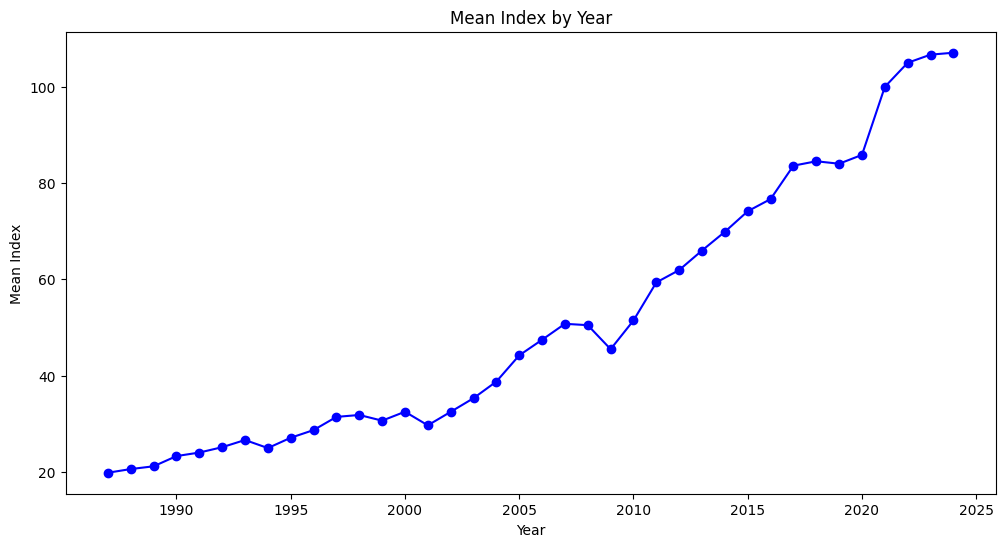

In [ ]:
mean_index_per_year = df1.groupby('Year')['Index'].mean()

plt.figure(figsize=(12, 6))
mean_index_per_year.plot(kind='line', color='blue', marker='o', linestyle='-')

plt.title('Mean Index by Year')
plt.xlabel('Year')
plt.ylabel('Mean Index')

plt.show()


In [16]:
# As we can see even tho there are some drops in certain years we can talk about improving in the total ındustry.
# Now for understanding the effect of calendar and season changes lets display the index and index_1's differance

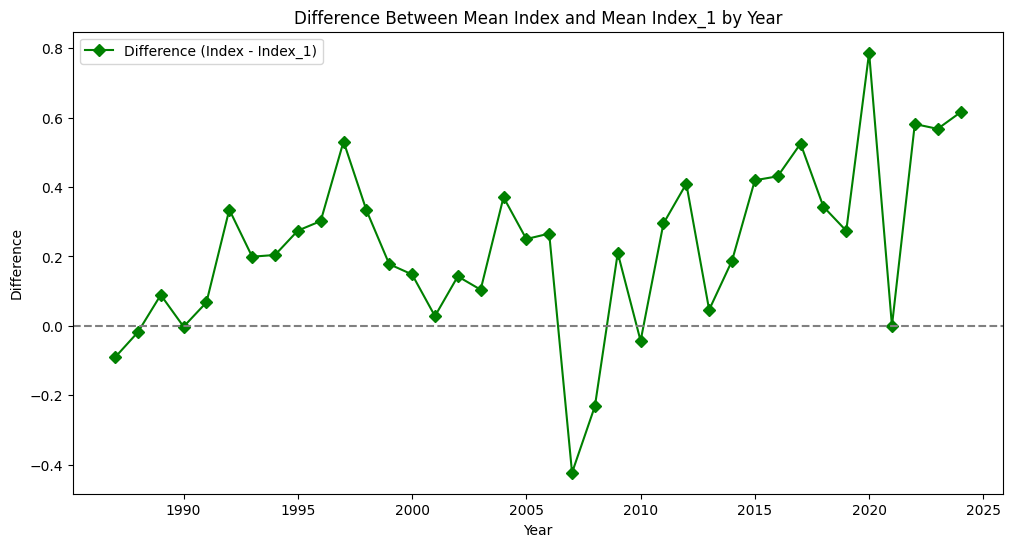

In [ ]:
df1['Index_Diff'] = df1['Index'] - df1['Index_1']
mean_diff_per_year = df1.groupby('Year')['Index_Diff'].mean()

plt.figure(figsize=(12, 6))
plt.plot(mean_diff_per_year, label='Difference (Index - Index_1)', color='green', marker='D', linestyle='-')
plt.axhline(0, color='gray', linestyle='--')

plt.title('Difference Between Mean Index and Mean Index_1 by Year')
plt.xlabel('Year')
plt.ylabel('Difference')
plt.legend()
plt.show()



In [18]:
# We can see the years which has the most differance. Lets extract these years

top_years = df1.groupby('Year')['Index_Diff'].mean().abs().nlargest(5)
print(top_years)


Year
2020    0.787110
2024    0.615363
2022    0.581609
2023    0.567614
1997    0.531182
Name: Index_Diff, dtype: float64


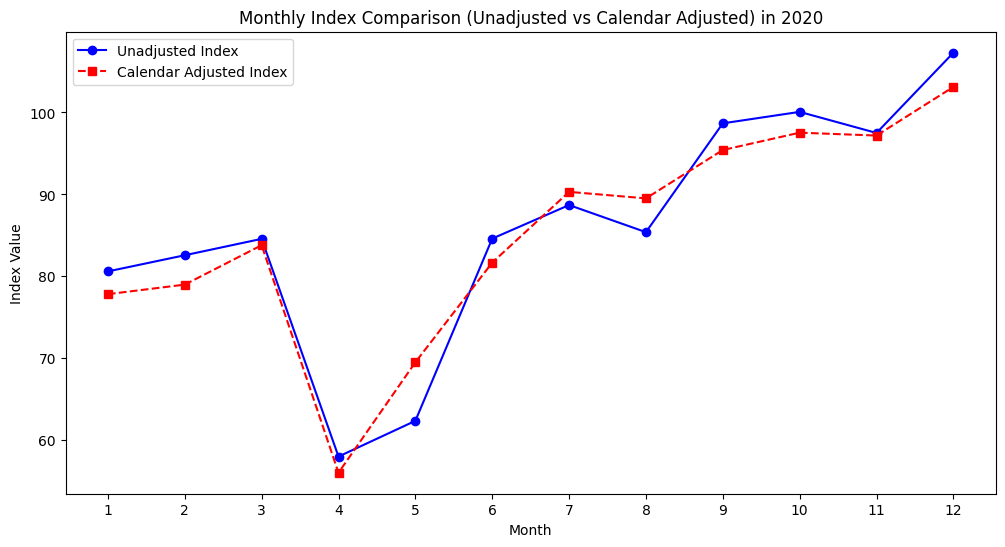

In [ ]:
df_2020 = df1[df1['Year'] == 2020]

plt.figure(figsize=(12, 6))

plt.plot(df_2020['Month'], df_2020['Index'], marker='o', linestyle='-', color='blue', label='Unadjusted Index')

plt.plot(df_2020['Month'], df_2020['Index_1'], marker='s', linestyle='--', color='red', label='Calendar Adjusted Index')

plt.title("Monthly Index Comparison (Unadjusted vs Calendar Adjusted) in 2020")
plt.xlabel("Month")
plt.ylabel("Index Value")
plt.xticks(df_2020['Month'])
plt.legend()

plt.show()


In [20]:
# We can see drastic changes in the index values in the months of April and May. This is likely due to the COVID-19 pandemic.

# When we look at the difference between unadjusted and calendar adjusted indexes, 
# we can see that the calendar adjusted index is higher than the unadjusted index in these months.

# This is likely due to the fact that the calendar adjusted index accounts for the effects of holidays and weekends, 
# which may have been more pronounced during the pandemic.

# Now lets display the Calendar adjusted columns annual change of 2020 to see this years index compared to previous year

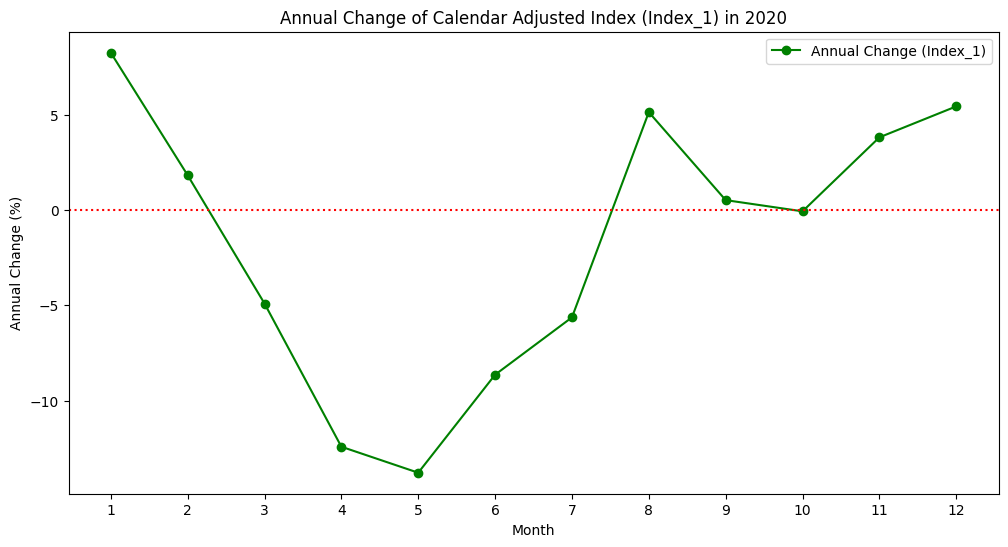

In [ ]:
df_2020 = df1[df1['Year'] == 2020]

plt.figure(figsize=(12, 6))

plt.plot(df_2020['Month'], df_2020['Annual_change_(%)_1'], marker='o', linestyle='-', color='green', label='Annual Change (Index_1)')

plt.axhline(y=0, color='red', linestyle='dotted')

plt.title("Annual Change of Calendar Adjusted Index (Index_1) in 2020")
plt.xlabel("Month")
plt.ylabel("Annual Change (%)")
plt.xticks(df_2020['Month'])
plt.legend()

plt.show()


In [22]:
# As we guess because of the pandemic, the annual change of the calendar adjusted index is negative in most months of 2020 starting march

# Now lets look at seasonal and calendar adjusted index's index and compare it with the unadjusted index calendar index to see if any 
# significant differance caused by the seasonal changes

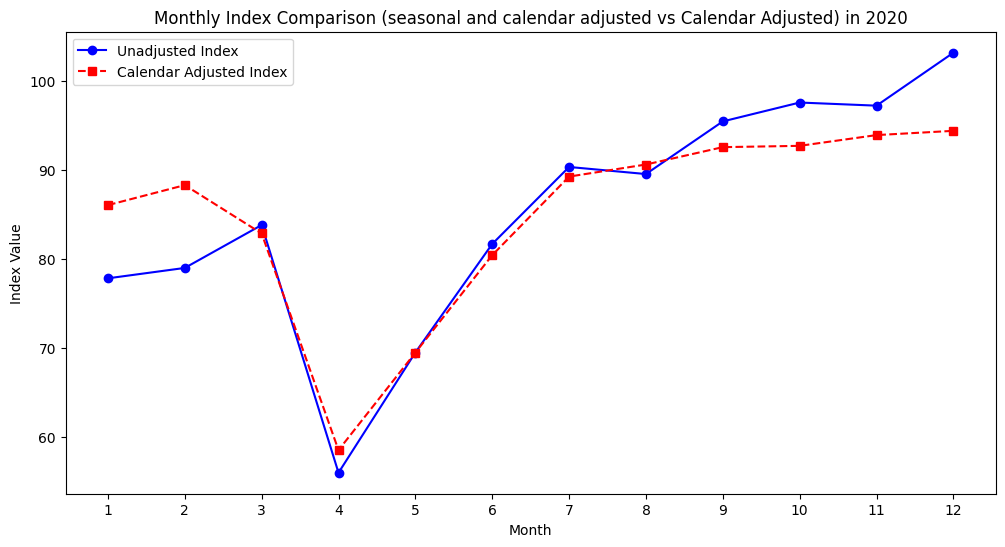

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(df_2020['Month'], df_2020['Index_1'], marker='o', linestyle='-', color='blue', label='Unadjusted Index')

plt.plot(df_2020['Month'], df_2020['Index_2'], marker='s', linestyle='--', color='red', label='Calendar Adjusted Index')

plt.title("Monthly Index Comparison (seasonal and calendar adjusted vs Calendar Adjusted) in 2020")
plt.xlabel("Month")
plt.ylabel("Index Value")
plt.xticks(df_2020['Month'])
plt.legend()

plt.show()

In [24]:
# There is no significant differance in pandemic months like calendar adjust/ unadjusted index comparison.

# But we can see in the Q1 seasonal effects are highly positive and Q4 they are negative.
# Q1 causes can be post-holiday effects (like new year), industry-specific trends 
# For Q4 it can be the end of the year, holiday season, and weather conditions.

# Now for the final touch for year 2020's analyses lets see 
# unadjusted, calender and seasonal adjusted index's clustered bar chart comparison

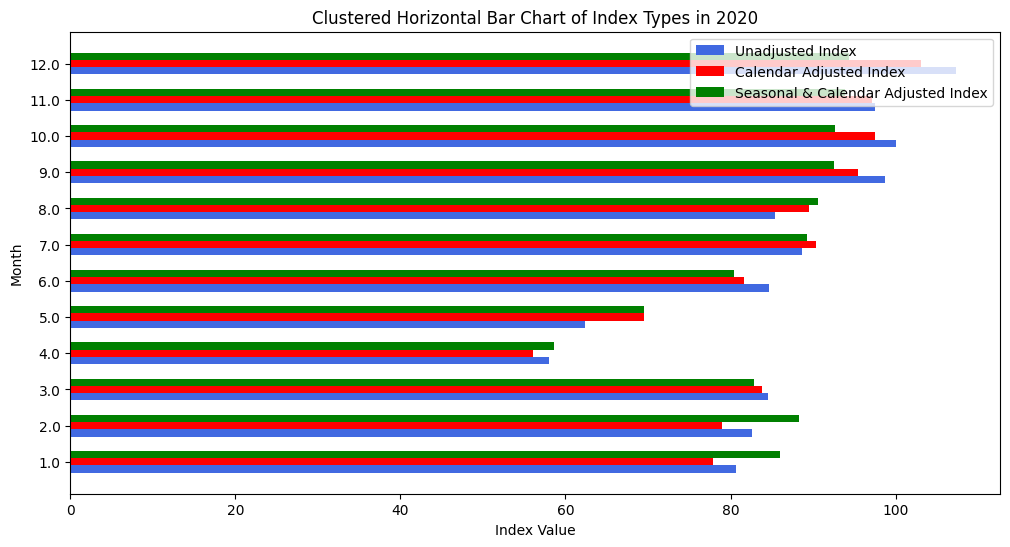

In [ ]:
bar_width = 0.2
months = np.arange(len(df_2020["Month"]))

plt.figure(figsize=(12, 6))

plt.barh(months - bar_width, df_2020["Index"], height=bar_width, label="Unadjusted Index", color='royalblue')
plt.barh(months, df_2020["Index_1"], height=bar_width, label="Calendar Adjusted Index", color='red')
plt.barh(months + bar_width, df_2020["Index_2"], height=bar_width, label="Seasonal & Calendar Adjusted Index", color='green')

plt.xlabel("Index Value")
plt.ylabel("Month")
plt.title("Clustered Horizontal Bar Chart of Index Types in 2020")
plt.yticks(months, df_2020["Month"])
plt.legend()

plt.show()


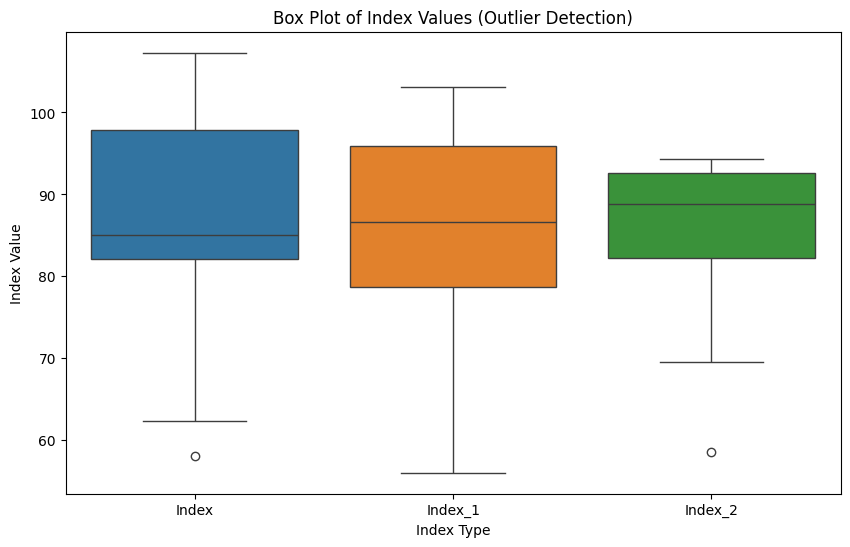

In [ ]:
index_columns = ["Index", "Index_1", "Index_2"]

plt.figure(figsize=(10, 6))
sea.boxplot(data=df_2020[index_columns])


plt.title("Box Plot of Index Values (Outlier Detection)")
plt.ylabel("Index Value")
plt.xlabel("Index Type")

plt.show()
